#  Q1. What is the mathematical formula for a linear SVM?

Formula:

**w^T * x + b = 0**

Here:

* **w** (omega) is a weight vector with the same dimensionality as your data points (x). It defines the direction of the hyperplane.
* **x** is a data point vector.
* **b** is the bias term, which determines the position of the hyperplane relative to the origin.

* If **w^T * x + b > 0**, the point belongs to class 1 (denoted by y = +1).
* If **w^T * x + b < 0**, the point belongs to class 2 (denoted by y = -1).


#  Q2. What is the objective function of a linear SVM?

The objective function of a linear SVM aims to achieve two goals simultaneously:

1. **Maximize the margin:** It seeks to find a hyperplane that has the maximum distance between the hyperplane and the closest data points from each class. These closest data points are called support vectors. A larger margin intuitively translates to better generalization on unseen data.

2. **Minimize classification error (soft margin):** In real-world datasets, data points might not be perfectly separable. The objective function incorporates a term to handle this by allowing some data points to be misclassified with a penalty. 

objective function:

**0.5 * ||w||^2 + C * Σ(ξ_i)**

#  Q3. What is the kernel trick in SVM?

The kernel trick in Support Vector Machines (SVM) is a technique used to extend linear SVMs to handle non-linear decision boundaries by implicitly mapping the input features into a higher-dimensional space, where the data points become more separable.

In SVM, the decision boundary is typically represented by a hyperplane in the feature space. In the case of a linear SVM, this hyperplane is a linear decision boundary. However, many real-world datasets are not linearly separable, meaning that a linear decision boundary cannot adequately separate the classes.

Commonly used kernel functions include:

1. **Linear Kernel**: K(xi,xj)=xiTxjK(xi​,xj​)=xiT​xj​
2. **Polynomial Kernel**: K(xi,xj)=(xiTxj+c)dK(xi​,xj​)=(xiT​xj​+c)d
3. **Radial Basis Function (RBF) Kernel**: K(xi,xj)=exp⁡(−γ∥xi−xj∥2)K(xi​,xj​)=exp(−γ∥xi​−xj​∥2)

#  Q4. What is the role of support vectors in SVM Explain with example 

In Support Vector Machines (SVM), support vectors are the data points that lie closest to the decision boundary (hyperplane) between the classes. These points play a crucial role in defining the decision boundary and determining the optimal hyperplane. Support vectors are the only data points that directly influence the placement of the decision boundary; all other data points are ignored once the optimal hyperplane is determined.

The role of support vectors :

1. **Defining the Margin**: The margin of an SVM is the distance between the decision boundary and the closest data points from each class. The support vectors are the data points that lie exactly on the margin or within the margin boundary. These points define the maximum margin hyperplane, which is the optimal decision boundary that maximizes the margin between the classes.

2. **Determining the Decision Boundary**: In SVM, the decision boundary is determined by the support vectors. The hyperplane is positioned such that it optimally separates the support vectors of different classes while maximizing the margin. This ensures that the decision boundary is as far away as possible from the support vectors, making it robust to variations in the data.

3. **Handling Non-linear Separable Data**: In cases where the data is not linearly separable, the support vectors also play a crucial role. They define the locations of the data points where the optimization algorithm focuses its efforts to find the optimal hyperplane in a higher-dimensional feature space (using the kernel trick). By focusing on the support vectors, the SVM can effectively handle non-linear decision boundaries and complex data distributions.

4. **Model Sparsity**: One of the key advantages of SVM is its ability to achieve model sparsity, meaning that the decision boundary depends only on a subset of the training data (the support vectors). This makes SVM efficient in terms of memory usage and computational complexity, especially when dealing with large datasets with high-dimensional feature spaces.

Example:
Consider a binary classification problem with two classes, represented by circles (o) and squares (□) in a 2D feature space. The filled circles and squares represent the support vectors.


# Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in SVM?

Let's illustrate the concepts of hyperplane, marginal plane, soft margin, and hard margin in SVM with examples and graphs:

1. **Hyperplane**:
   - In SVM, a hyperplane is a decision boundary that separates the data points of different classes. For a binary classification problem in a 2D feature space, the hyperplane is a straight line. In higher dimensions, it's a plane.
   - Example: Consider a 2D dataset with two classes (red and blue). The hyperplane that separates the classes is shown as a dashed line in the graph below.

![Hyperplane Example](SVM-660x371.jpg)


2. **Marginal Plane**:
   - The marginal plane in SVM is the boundary parallel to the hyperplane that defines the maximum margin between the hyperplane and the support vectors. It is the outer boundary of the margin.
   - Example: In the same 2D dataset, the marginal planes are represented by the parallel dashed lines that touch the support vectors. The region between these planes is the margin.

   ![Marginal Plane Example](svmexample-660x446.JPG)

3. **Soft Margin**:
   - In a soft-margin SVM, the optimization problem allows for some misclassification of training examples to achieve a wider margin and improve generalization to unseen data. It introduces a penalty for misclassifications through a regularization parameter \( C \).
   - Example: In the graph below, the dashed lines represent the soft margin. Some data points are allowed to cross the margin boundaries, but misclassifications are penalized. The regularization parameter \( C \) controls the trade-off between margin width and misclassification errors.

   ![Soft Margin Example](images.png)

4. **Hard Margin**:
   - In a hard-margin SVM, there is no allowance for misclassification in the training set. The optimization problem aims to find the maximum-margin hyperplane that correctly classifies all training examples.
   - Example: In the graph below, the solid lines represent the hard margin. All data points are correctly classified, and no points lie within the margin boundaries.

   ![Hard Margin Example](Untitled.png)


Q6. SVM Implementation through Iris dataset.
 - Load the iris dataset from the scikit-learn library and split it into a training set and a testing set
 - Train a linear SVM classifier on the training set and predict the labels for the testing set
 - Compute the accuracy of the model on the testing set
 - Plot the decision boundaries of the trained model using two of the features
 - Try different values of the regularisation parameter C and see how it affects the performance of
the model.


Accuracy: 0.7333333333333333


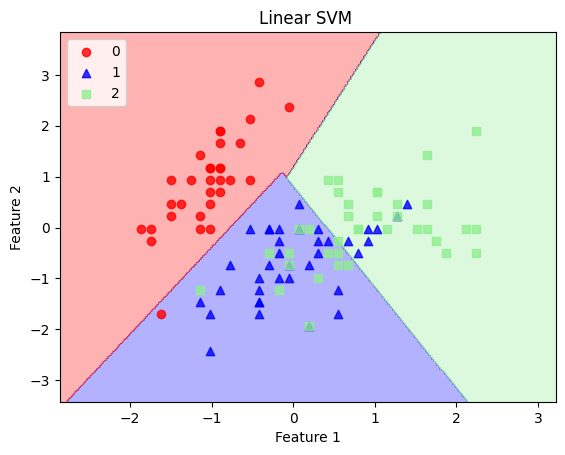

Accuracy2: 0.8
Accuracy3: 0.7333333333333333


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

def plot_decision_boundary(X, y, classifier, title):
    markers = ('o', '^', 's')
    colors = ('red', 'blue', 'lightgreen')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    resolution = 0.02
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=[cmap(idx)], marker=markers[idx], label=cl)
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(loc='upper left')
    plt.title(title)
    plt.show()

svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
plot_decision_boundary(X_train, y_train, svm, title='Linear SVM ')

svm = SVC(kernel='linear', C=2.0, random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy2:", accuracy)


svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy3:", accuracy)
